In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,STRUCTURE PRESCRIPTRICE,PLATEFORME,year,month,region,ORIENTATION,NATURE_DIFF,age,tranche_age,...,nb_immo,crd_immo,nb_rac,crd_rac,nb_autres,crd_autres,nb_decouvert,crd_decouvert,moy_eco_jour,cat_moy_eco_jour
0,1550,PRESCRIPTEUR35,bancaire,2015,7,BOURGOGNE FRANCHE COMTE,Surendettement,Surendettement,\N,Non Renseigne,...,0,\N,0,\N,0,\N,0,\N,"2,53333","0a2,99€"
1,2249,PRESCRIPTEUR16,bancaire,2016,2,OCCITANIE,Mediation,Endettement,\N,Non Renseigne,...,0,\N,0,\N,0,\N,0,\N,"-3,31667",Négatif
2,2670,PRESCRIPTEUR18,social,2016,4,PROVENCE-ALPES-COTE-D'AZUR,Accompagnement,Endettement,\N,Non Renseigne,...,0,\N,0,\N,1,3996,0,\N,"-24,7667",Négatif
3,1102,PRESCRIPTEUR6,bancaire,2014,11,BRETAGNE,Mediation,Multiendettement,\N,Non Renseigne,...,0,\N,0,\N,0,\N,0,\N,"29,5667",15€et+
4,7069,PRESCRIPTEUR23,social,2018,9,NOUVELLE AQUITAINE,Accompagnement,Difficultés de Gestion,24,<25ans,...,0,\N,0,\N,0,\N,0,\N,"-19,15",Négatif


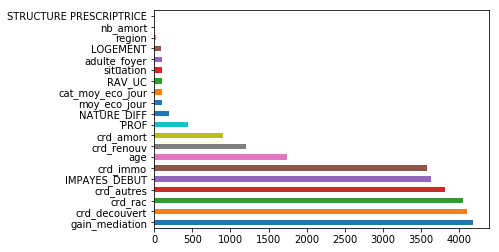

In [7]:
train = train.replace('\\N',np.NAN)
train.isna().sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.show()

# Traitement des NA

## CRD et nb

In [24]:
train[train.crd_decouvert.isna()][['crd_decouvert','nb_decouvert']].sum()

crd_decouvert    0.0
nb_decouvert     0.0
dtype: float64

La colonne **crd_decouvert** contient des **NA** lorsque la colonne **nb_couvert**. Ce n'est donc pas un vrai manque de valeur. Nous pouvons remplacer ces **NA** par **0**.

Vérifions cette hypothèse pour les colonnes **CRD - nb**.

In [41]:
for CRD in train.columns.tolist():
    if 'crd_' in CRD:
        _type = CRD.split('_')[1]
        print('\n')
        print(dict(train[train[CRD].isna()][[CRD,f'nb_{_type}']].sum()))



{'crd_amort': 0.0, 'nb_amort': 0.0}


{'crd_renouv': 0.0, 'nb_renouv': 0.0}


{'crd_immo': 0.0, 'nb_immo': 0.0}


{'crd_rac': 0.0, 'nb_rac': 0.0}


{'crd_autres': 0.0, 'nb_autres': 0.0}


{'crd_decouvert': 0.0, 'nb_decouvert': 0.0}


In [50]:
for CRD in train.columns.tolist():
    if 'crd_' in CRD:
        train[CRD] = train[CRD].fillna(0)
train.head()

,id,STRUCTURE PRESCRIPTRICE,PLATEFORME,year,month,region,ORIENTATION,NATURE_DIFF,age,tranche_age,...,nb_immo,crd_immo,nb_rac,crd_rac,nb_autres,crd_autres,nb_decouvert,crd_decouvert,moy_eco_jour,cat_moy_eco_jour
0,1550,PRESCRIPTEUR35,bancaire,2015,7,BOURGOGNE FRANCHE COMTE,Surendettement,Surendettement,NaN,Non Renseigne,...,0,0,0,0,0,0,0,0,"2,53333","0a2,99€"
1,2249,PRESCRIPTEUR16,bancaire,2016,2,OCCITANIE,Mediation,Endettement,NaN,Non Renseigne,...,0,0,0,0,0,0,0,0,"-3,31667",Négatif
2,2670,PRESCRIPTEUR18,social,2016,4,PROVENCE-ALPES-COTE-D'AZUR,Accompagnement,Endettement,NaN,Non Renseigne,...,0,0,0,0,1,3996,0,0,"-24,7667",Négatif
3,1102,PRESCRIPTEUR6,bancaire,2014,11,BRETAGNE,Mediation,Multiendettement,NaN,Non Renseigne,...,0,0,0,0,0,0,0,0,"29,5667",15€et+
4,7069,PRESCRIPTEUR23,social,2018,9,NOUVELLE AQUITAINE,Accompagnement,Difficultés de Gestion,24,<25ans,...,0,0,0,0,0,0,0,0,"-19,15",Négatif


## Age

In [53]:
train.tranche_age = train.tranche_age.replace('Non Renseigne', np.NAN)

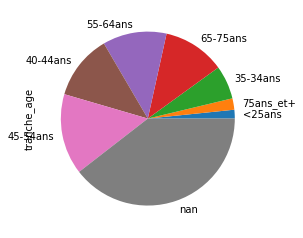

In [60]:
train.tranche_age.value_counts(ascending=True,dropna=False,normalize=True).plot(kind='pie',)

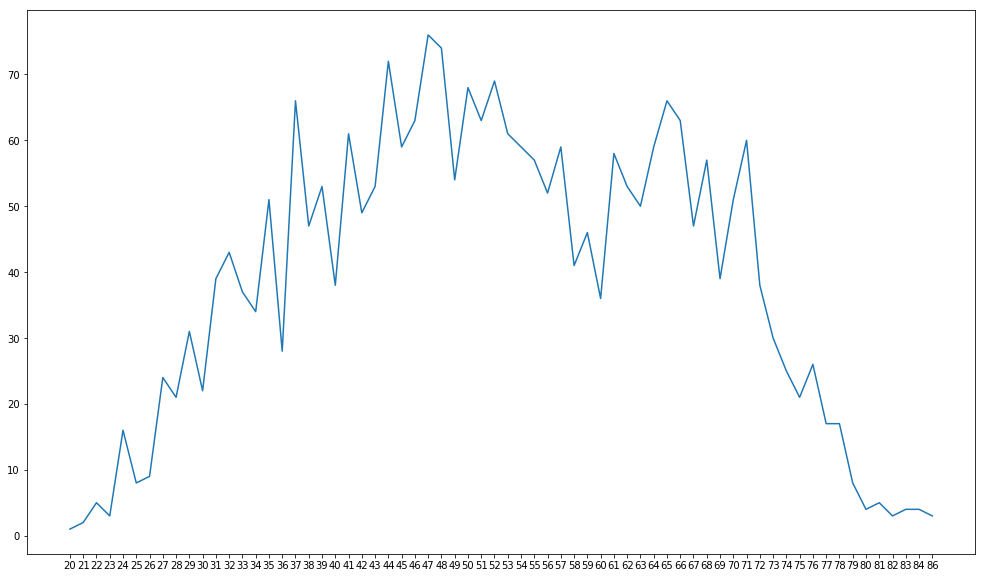

In [105]:
ar = pd.DataFrame({'age':train.age.value_counts().index,'nb':train.age.value_counts().values}).sort_values('age')
fig = plt.figure(figsize=(17, 10))
plt.plot(ar.age,ar.nb)

In [104]:
round(train.age.isna().sum()/train.age.shape[0],ndigits=3)

0.405

La répartition de l'**âge** est intéressante, on semble distinguer une **hyperbole centrée en 52**. Cependant il y a tout de même trop de **NA** pour les remplacer par la **mediane** de la colonne **âge**.

# Traitement des données catégorielles

In [4]:
train.ORIENTATION.value_counts(normalize=True).round(2)

Surendettement                   0.42
Accompagnement                   0.40
Mediation                        0.09
Aucune                           0.08
Autres Procédures Collectives    0.01
Microcredit                      0.00
Name: ORIENTATION, dtype: float64

Les deux catégories de classification majoritaires sont: **Surendettement** et **Accompagnement**